In [1]:
import matplotlib.pyplot as plt
from PIL import ImageDraw
import matplotlib.patches as patches
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets, models
import os
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

## AlexNet Classification for Humans

In [2]:
# Define transforms for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Set the directories for the dataset
data_dir = '/Users/reneortiz/AppliedAI/Introduction to AI/final-project/human detection dataset'

# Define dataset and dataloaders
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


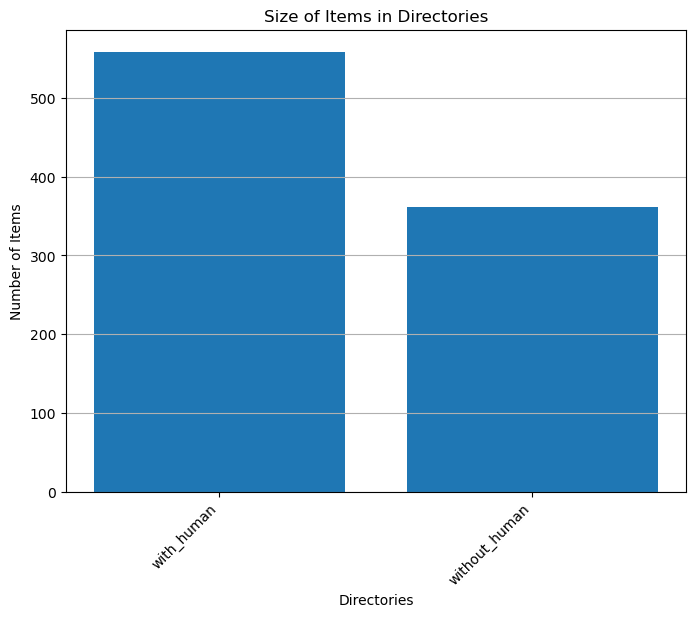

In [28]:
# Get the list of directories in the data directory
directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Get the count of items (images) in each directory
item_counts = [len(os.listdir(os.path.join(data_dir, d))) for d in directories]

# Plotting the size of items in directories
plt.figure(figsize=(8, 6))
plt.bar(directories, item_counts)
plt.xlabel('Directories')
plt.ylabel('Number of Items')
plt.title('Size of Items in Directories')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [3]:
#Display information from the train_loader variable
# Accessing Batch Size
batch_size = train_loader.batch_size
print("Batch Size:", batch_size)


# Calculating Total Number of Batches
total_batches = len(train_loader)
print("Total Batches:", total_batches)

# Iterating Over Batches
for batch_idx, (images, labels) in enumerate(train_loader):
    # Process the batch
    print(f"Batch {batch_idx+1}: Images shape: {images.shape}, Labels shape: {labels.shape}")

Batch Size: 32
Total Batches: 23
Batch 1: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 2: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 3: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 4: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 5: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 6: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 7: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 8: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 9: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 10: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 11: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 12: Images shape: torch.

/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 0.7989, Train Acc: 47.28%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [2/10], Train Loss: 0.8063, Train Acc: 45.65%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [3/10], Train Loss: 0.8018, Train Acc: 46.20%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [4/10], Train Loss: 0.8018, Train Acc: 47.15%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [5/10], Train Loss: 0.8050, Train Acc: 47.55%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [6/10], Train Loss: 0.8049, Train Acc: 47.28%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [7/10], Train Loss: 0.8111, Train Acc: 45.79%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [8/10], Train Loss: 0.8097, Train Acc: 46.60%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [9/10], Train Loss: 0.8298, Train Acc: 45.11%, Test Loss: 0.7572, Test Acc: 47.57%
Epoch [10/10], Train Loss: 0.8173, Train Acc: 47.01%, Test Loss: 0.7572, Test Acc: 47.57%


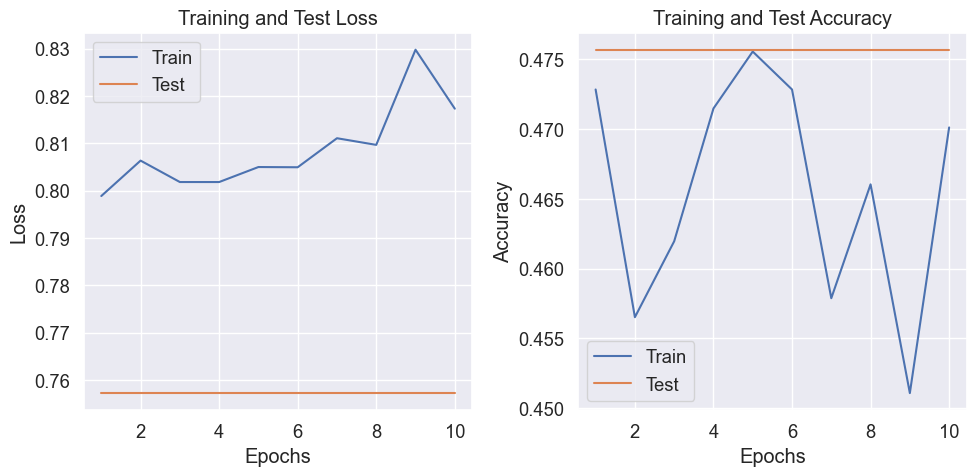

In [84]:
# Define the AlexNet model
alexnet = models.alexnet(pretrained=True)
num_features = alexnet.classifier[6].in_features
#2 features : with humans and without
alexnet.classifier[6] = nn.Linear(num_features, 2)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)

# Training loop
num_epochs = 10
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    # Training
    alexnet.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)

    # Validation
    alexnet.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = alexnet(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_losses.append(running_loss / len(test_loader))
    test_accuracy.append(correct_test / total_test)

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracy[-1]*100:.2f}%, "
          f"Test Loss: {test_losses[-1]:.4f}, "
          f"Test Acc: {test_accuracy[-1]*100:.2f}%")

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train')
plt.plot(range(1, num_epochs+1), test_losses, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracy, label='Train')
plt.plot(range(1, num_epochs+1), test_accuracy, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Define the AlexNet model
alexnet = models.alexnet(pretrained=True)
num_features = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_features, 2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

#Train the model
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#alexnet.to(device)

#num_epochs = 10
#for epoch in range(num_epochs):
#    running_loss = 0.0
#    for images, labels in train_loader:
#        images, labels = images.to(device), labels.to(device)
#        optimizer.zero_grad()
#       outputs = alexnet(images)
#       loss = criterion(outputs, labels)
#        loss.backward()
#        optimizer.step()
#        running_loss += loss.item()
#    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

In [48]:
# Lists to store training and test accuracy
train_accuracy = []
test_accuracy = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    # Training
    alexnet.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    train_loss = running_loss / len(train_loader)
    train_accuracy.append(correct_train / total_train)
    
    # Validation
    alexnet.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = alexnet(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_loss = running_loss / len(test_loader)
    test_accuracy.append(correct_test / total_test)

    print(f"Epoch {epoch+1}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Test Loss: {test_loss:.4f}, "
          f"Test Accuracy: {test_accuracy[-1]*100:.2f}%")



Epoch 1, Train Loss: 0.0122, Test Loss: 0.4590, Test Accuracy: 87.03%
Epoch 2, Train Loss: 0.0057, Test Loss: 0.4788, Test Accuracy: 87.03%
Epoch 3, Train Loss: 0.0051, Test Loss: 0.4604, Test Accuracy: 87.03%
Epoch 4, Train Loss: 0.0045, Test Loss: 0.4816, Test Accuracy: 87.57%
Epoch 5, Train Loss: 0.0034, Test Loss: 0.5216, Test Accuracy: 86.49%
Epoch 6, Train Loss: 0.0027, Test Loss: 0.5213, Test Accuracy: 87.57%
Epoch 7, Train Loss: 0.0032, Test Loss: 0.5360, Test Accuracy: 86.49%
Epoch 8, Train Loss: 0.0026, Test Loss: 0.5438, Test Accuracy: 87.57%
Epoch 9, Train Loss: 0.0017, Test Loss: 0.5432, Test Accuracy: 87.57%
Epoch 10, Train Loss: 0.0043, Test Loss: 0.6619, Test Accuracy: 87.57%


In [49]:
# Calculate model accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Accuracy of the network on the test images: {:.2%}'.format(accuracy))

Accuracy of the network on the test images: 87.57%


[0.998641304347826, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998641304347826]
[0.8702702702702703, 0.8702702702702703, 0.8702702702702703, 0.8756756756756757, 0.8648648648648649, 0.8756756756756757, 0.8648648648648649, 0.8756756756756757, 0.8756756756756757, 0.8756756756756757]


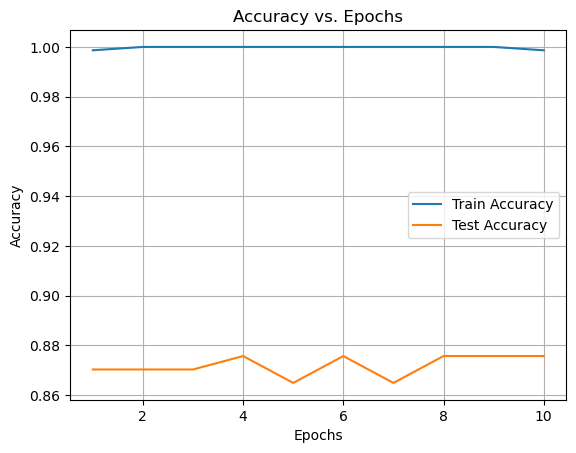

In [50]:
print(train_accuracy)
print(test_accuracy)
# Number of epochs
num_epochs = len(train_accuracy)

# Plotting accuracy vs. epochs
plt.plot(range(1, num_epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

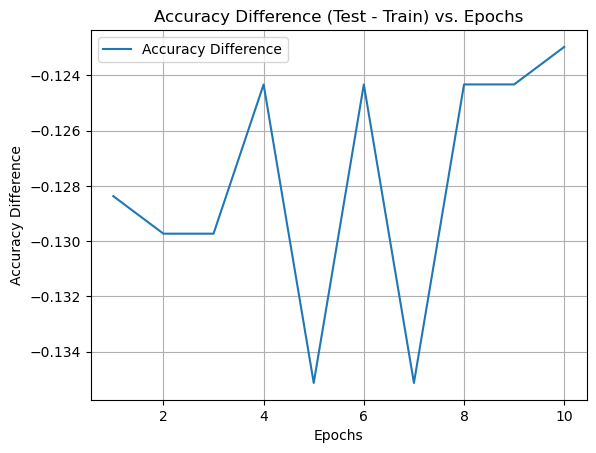

In [51]:
# Calculate accuracy difference
accuracy_difference = [test_acc - train_acc for test_acc, train_acc in zip(test_accuracy, train_accuracy)]

# Plotting accuracy difference vs. epochs
plt.plot(range(1, num_epochs+1), accuracy_difference, label='Accuracy Difference')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Difference')
plt.title('Accuracy Difference (Test - Train) vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()

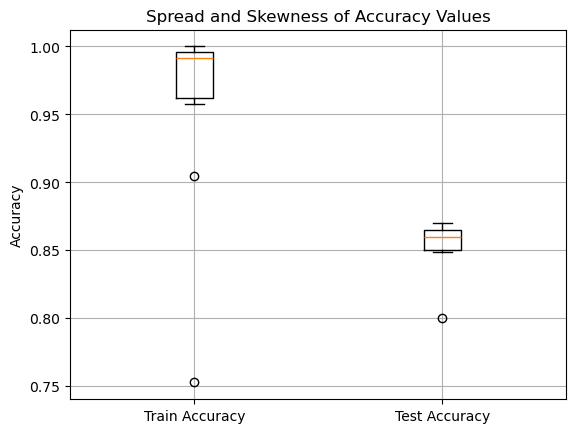

In [45]:
# Combine train and test accuracy for box plot
accuracy_data = [train_accuracy, test_accuracy]

# Plotting box plot
plt.boxplot(accuracy_data, labels=['Train Accuracy', 'Test Accuracy'])
plt.ylabel('Accuracy')
plt.title('Spread and Skewness of Accuracy Values')
plt.grid(True)
plt.show()

In [52]:
from torchsummary import summary
# Display summary of the trained AlexNet classifier
summary(alexnet, (3, 224, 224))  # Input size is (batch_size, channels, height, width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [54]:
# Test the model
alexnet.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
#print("Accuracy: {accuracy})
print("Confusion Matrix:")
for row in conf_matrix:
    print(row)
# Display confusion matrix


Confusion Matrix:
[106   7]
[16 56]


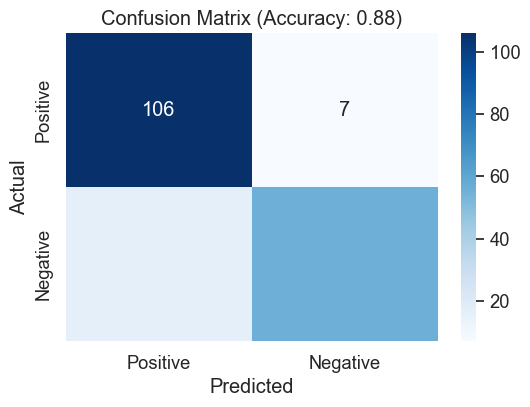

In [55]:
# Display confusion matrix
# Calculate True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]


# Display confusion matrix with all values
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap([[TN, FP], [FN, TP]], annot=True, fmt='d', cmap="Blues", cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.show()

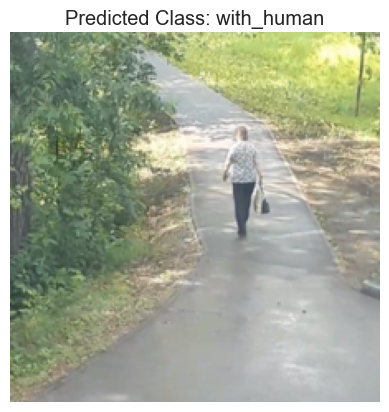

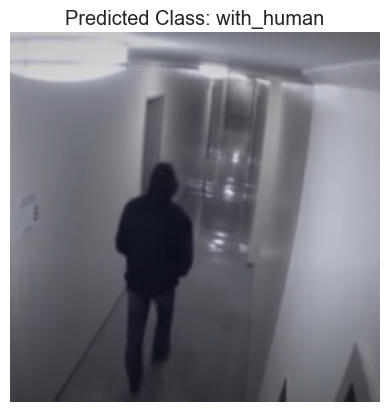

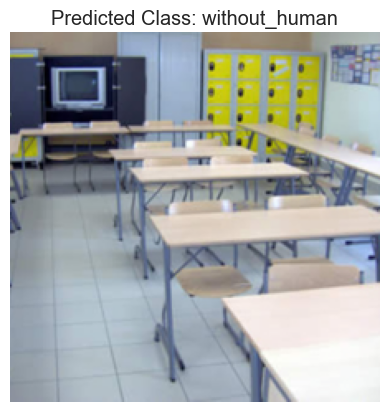

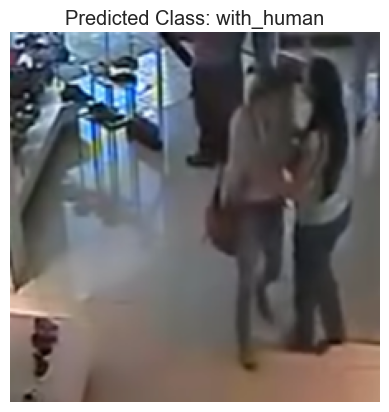

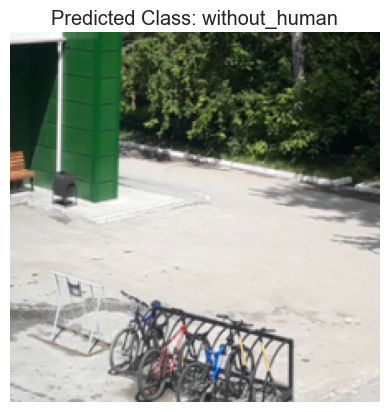

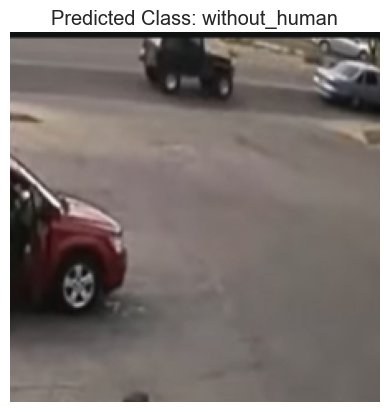

In [62]:
class_names = ['with_human', 'without_human']
# Loop to sample 6 images
for _ in range(6):
    # Sample a random index from the test dataset
    sample_idx = np.random.randint(len(test_dataset))
    sample_image, sample_label = test_dataset[sample_idx]

    with torch.no_grad():
        # Forward pass through the model
        output = alexnet(sample_image.unsqueeze(0).to(device))
        _, predicted_class = torch.max(output, 1)

    # Convert tensor to numpy array and reorder dimensions
    sample_image_np = sample_image.permute(1, 2, 0).numpy()
    # Denormalize the image
    sample_image_np = sample_image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    sample_image_np = np.clip(sample_image_np, 0, 1)

    # Plot the image with predicted class
    plt.imshow(sample_image_np)
    plt.title(f"Predicted Class: {class_names[predicted_class.item()]}")
    plt.axis('off')
    plt.show()

## Using a pre-trained model to locate humans in images

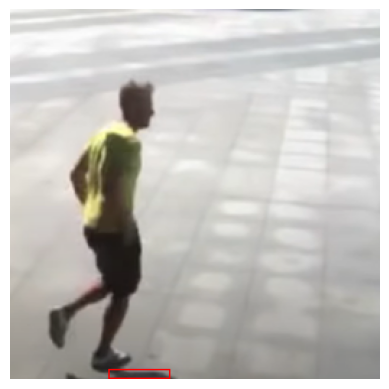

In [41]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

def detect_human(image_path):
    # Load image
    image = Image.open(image_path).convert("RGB")
    
    # Define the transformation
    transform = T.Compose([T.ToTensor()])
    
    # Apply the transformation
    image_tensor = transform(image)
    
    # Load the pre-trained model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # Initialize Faster R-CNN model with pre-trained weights
    #model = fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=True)
    model.eval()
    
    # Forward pass through the model
    with torch.no_grad():
        prediction = model([image_tensor])
    
    # Draw bounding boxes around detected humans
    draw = ImageDraw.Draw(image)
    for element in prediction[0]['labels']:
        if element.item() == 1:  # 1 corresponds to 'person' class in COCO dataset
            box = prediction[0]['boxes'][element]
            draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="red")
    
    # Display the image with bounding boxes
    plt.imshow(np.array(image))
    plt.axis('off')
    plt.show()

# Test with a sample image
image_path = '222.png'
detect_human(image_path)